In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_parquet('../data/yellow_tripdata_2022-01.parquet')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
df_train.shape

(2463931, 19)

In [15]:
len(df_train)

2463931

In [14]:
df_train.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000
2463930,2,2022-01-31 23:46:00,2022-02-01 00:13:00,NaN,8.94,NaN,None,186,181,0,25.48,0.0,0.5,6.28,0.0,0.3,35.06,NaN,NaN,27.000000


**Q1** ans:19

In [5]:
df_train['duration'] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)

In [6]:
df_train['duration'].loc[0:5]

0    17.816667
1     8.400000
2     8.966667
3    10.033333
4    37.533333
5    29.550000
Name: duration, dtype: float64

In [7]:
round(df_train['duration'].std(), 2)

46.45

**Q2** ans: 46.45

<Axes: >

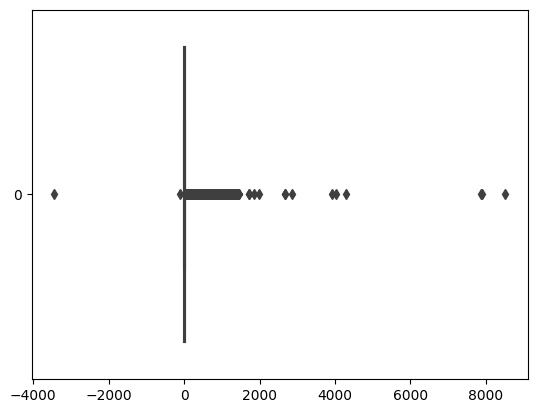

In [10]:
sns.boxplot(data=df_train['duration'], orient='horizontal')
#sns.histplot(df_train['duration'], kde=True)
#df_train.duration.plot()
#plt.show()

In [13]:
df_train['duration'].describe(percentiles=[0.03,0.97])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
3%       2.316667e+00
50%      1.018333e+01
97%      3.753333e+01
max      8.513183e+03
Name: duration, dtype: float64

In [16]:
len_old=len(df_train)
df_train = df_train[(df_train.duration >= 1) & (df_train.duration <= 60)]
len(df_train)

2421440

In [20]:
remain = 100.0*len(df_train)/len_old
print(f"remained: {round(remain, 2)}","%")

remained: 98.28 %


**Q3** ans: 98%

In [23]:
categorical = ['PULocationID', 'DOLocationID']

df_train[categorical] = df_train[categorical].astype(str)

In [33]:
train_dicts = df_train[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df_train[target].values

In [25]:
X_train.shape

(2421440, 515)

**Q4** ans: 515

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [29]:
mean_squared_error(y_train, y_pred, squared=False)

6.98619123059128

**Q5** ans: RMSE on train = 6.99

In [34]:
df_val = pd.read_parquet('../data/yellow_tripdata_2022-02.parquet')

df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [35]:
categorical = ['PULocationID', 'DOLocationID']

df_val[categorical] = df_val[categorical].astype(str)

val_dicts = df_val[categorical].to_dict(orient='records')

#dv = DictVectorizer()
X_val = dv.transform(val_dicts)

target = 'duration'
y_val = df_val[target].values

In [36]:
#lr = LinearRegression()
#lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [37]:
mean_squared_error(y_val, y_pred, squared=False)

7.786413522518241

**Q6** ans: RMSE on val = 7.79